In [2]:
import numpy as np
import matplotlib.pyplot as plt

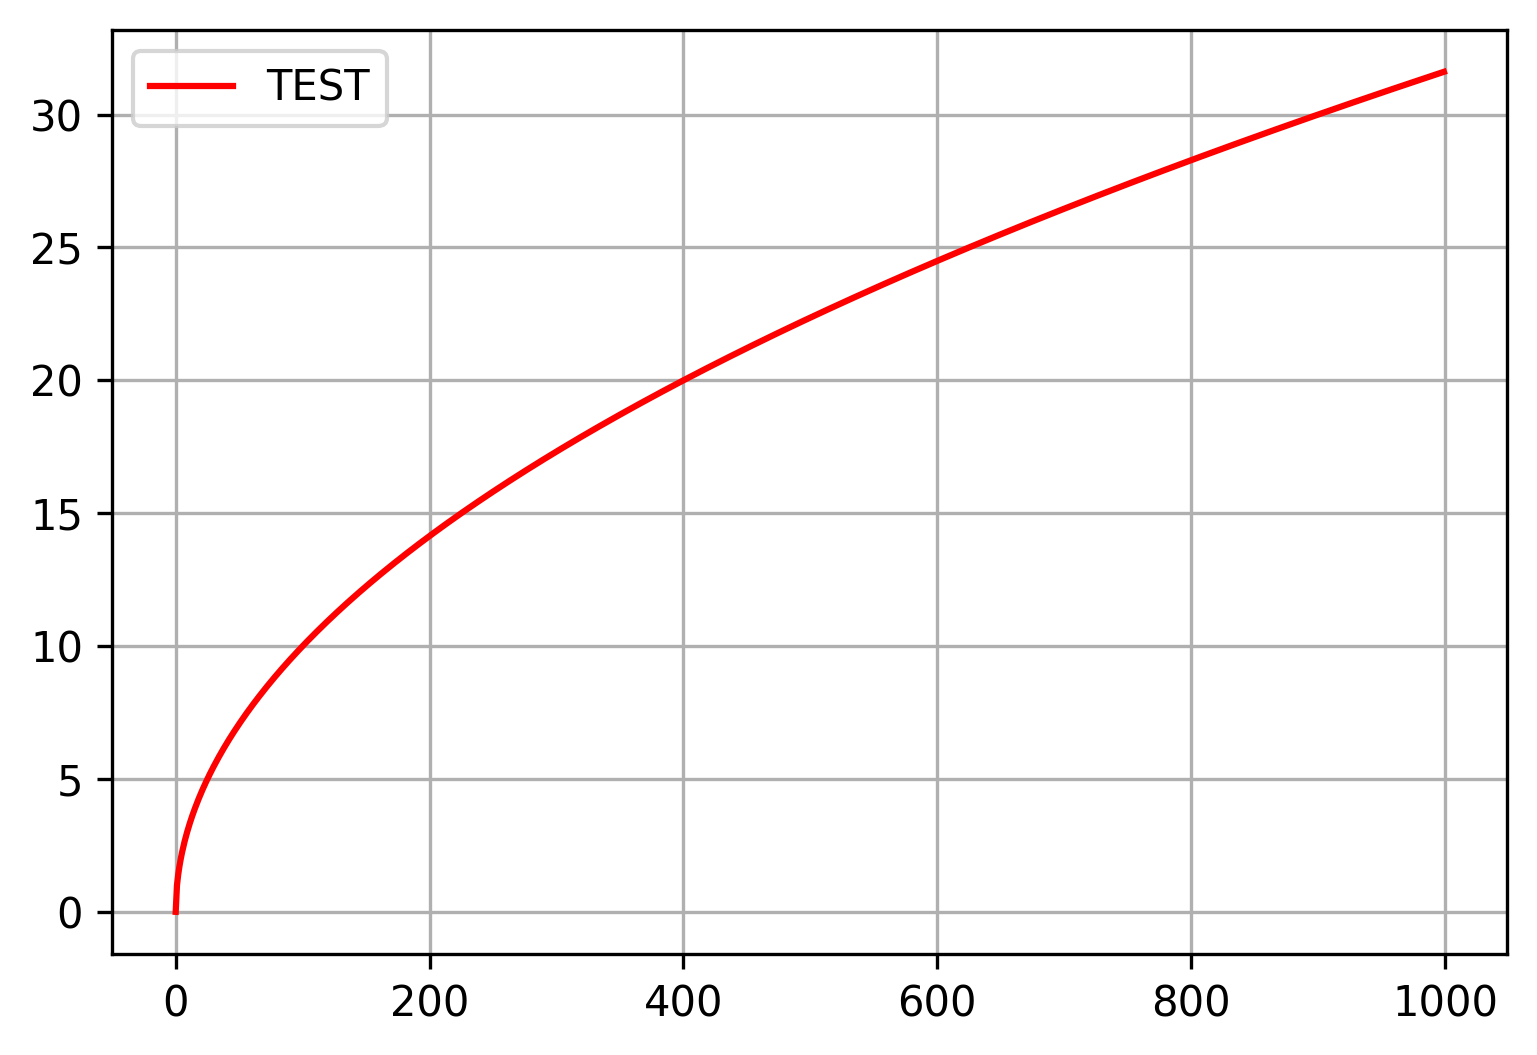

In [3]:
X = np.arange(0, 1000, 1)
Y = np.sqrt(X)

plt.figure(figsize=(6,4), dpi=300)
plt.plot(X, Y, 'r-', label="TEST")
plt.grid('minor')
plt.legend()


In [72]:
def plotasy(data, N, Nprew):

    color1 = "#ee4035"
    color3 = "#f37736"
    color4 = "#7bc043"
    color2 = "#0392cf"

    plt.figure(figsize=(4,4), dpi=200)
    plt.plot(data[Nprew + 3*N:Nprew + 4*N,0], data[Nprew + 3*N:Nprew + 4*N,1], 'o', markeredgecolor=color1, markerfacecolor=color1, markersize=0.6, alpha=0.8, label="t = 100.0")
    plt.plot(data[Nprew + 2*N:Nprew + 3*N,0], data[Nprew + 2*N:Nprew + 3*N,1], 'o', markeredgecolor=color2, markerfacecolor=color2, markersize=0.6, alpha=0.8, label="t = 10.0")
    plt.plot(data[Nprew + N:Nprew + 2*N,0], data[Nprew + N:Nprew + 2*N,1], 'o', markeredgecolor=color3, markerfacecolor=color3, markersize=0.6, alpha=0.8, label="t = 1.0")
    plt.plot(data[Nprew + 0:Nprew + N,0], data[Nprew + 0:Nprew + N,1], 'o', markeredgecolor=color4, markerfacecolor=color4, markersize=0.6, alpha=0.8, label="t = 0.1")
    plt.grid(True)
    plt.title(str(N) + " cząsteczek")
    plt.xlabel("Współrzędna X")
    plt.ylabel("Współrzędna Y")
    plt.legend(markerscale=8, fontsize=8, loc='center left', bbox_to_anchor=(1, 0.5))

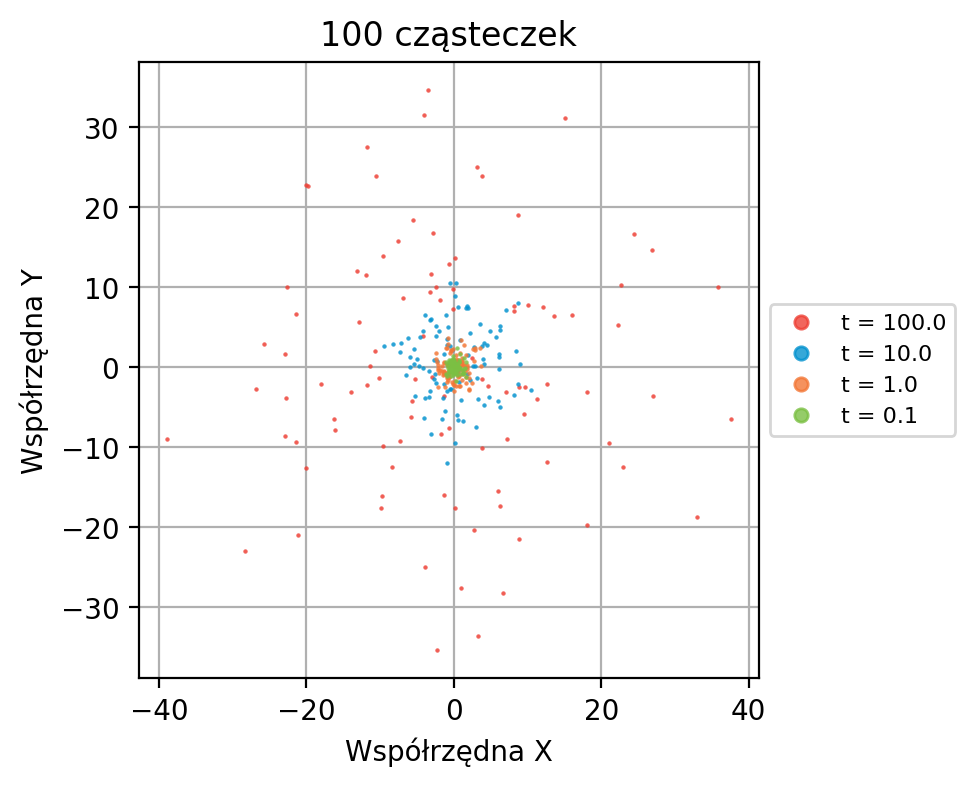

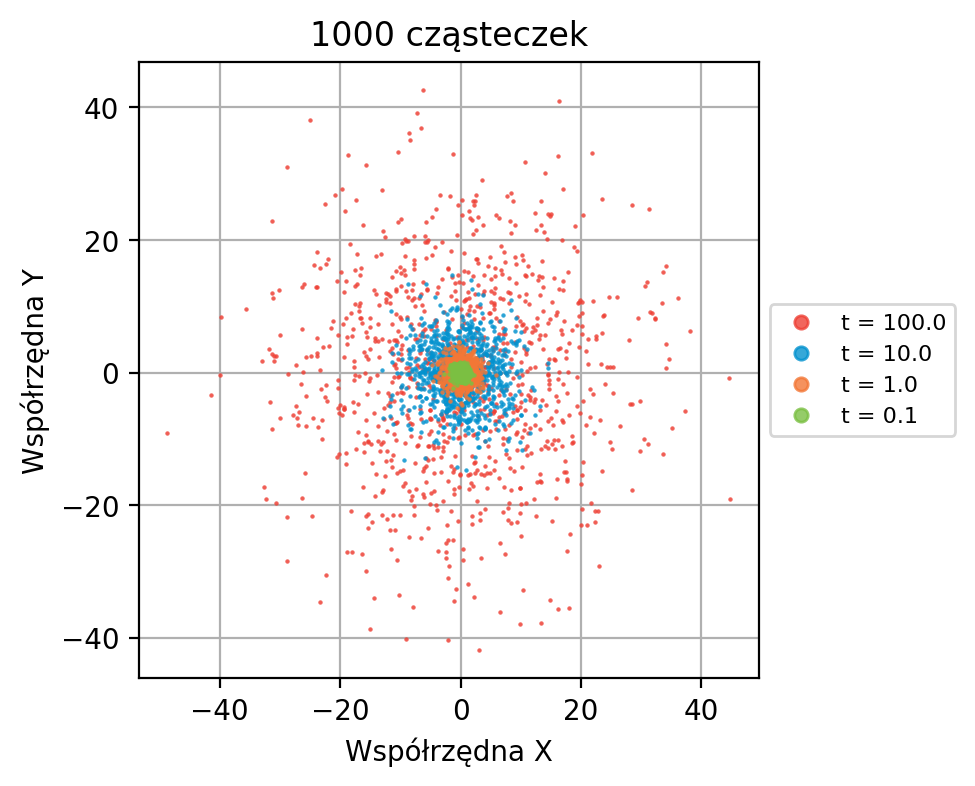

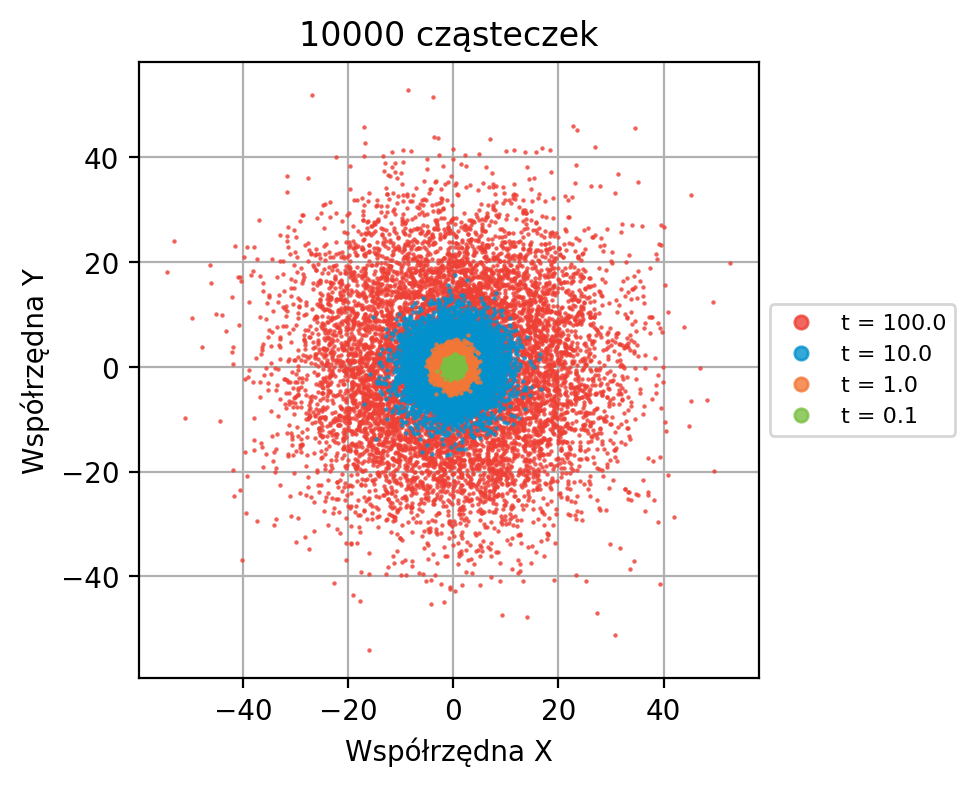

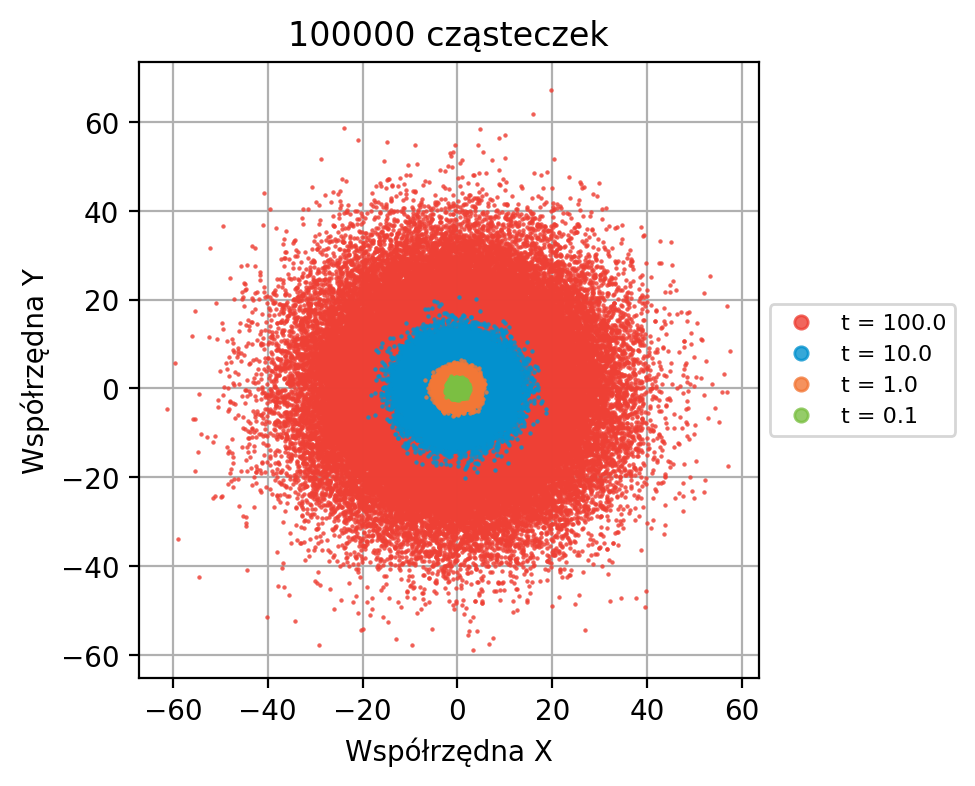

In [73]:
data = np.loadtxt("wiener.dat", comments="#", delimiter=" ", unpack=False)

Ns = np.array([0, 10**2, 10**3, 10**4, 10**5]) #
Nprew = 0
for N in range(len(Ns)-1):
    Nprew += Ns[N]*4
    plotasy(data, Ns[N+1], Nprew)